In [0]:
from fastai.vision import *

In [0]:
!mkdir /content/bears
import os
os.chdir('/content/bears')

Download the 3 txt files by going to Google Images and use the JS script in the console



```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```


Upload the 3 text files

In [0]:
names = ['black','brown','teddies']
for i in names:
  !mkdir i
  file = i + '.txt'
  dest = i
  download_images(file, dest, max_pics=200)

In [0]:
classes = ['teddies','brown','black']

In [24]:
for c in classes:
    print(c)
    verify_images(c, delete=True, max_size=500)

teddies


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='teddies/00000110.jpg'>
Image teddies/00000136.png has 4 instead of 3 channels
Image teddies/00000122.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='teddies/00000030.jpg'>
Image teddies/00000146.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='teddies/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='teddies/00000025.jpg'>
Image teddies/00000012.png has 4 instead of 3 channels
Image teddies/00000108.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='teddies/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='teddies/00000088.jpeg'>
brown


cannot identify image file <_io.BufferedReader name='brown/00000145.jpg'>
Image brown/00000058.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='brown/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000186.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000124.png'>
cannot identify image file <_io.BufferedReader name='brown/00000068.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000114.jpeg'>
cannot identify image file <_io.BufferedReader name='brown/00000197.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='brown/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='brown

cannot identify image file <_io.BufferedReader name='black/00000082.jpg'>
Image black/00000005.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='black/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000199.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000114.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000189.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000158.jpg'>
cannot identify image file <_io.BufferedReader name='black/00000095.jpg'>
cannot identify image file <_io.BufferedReader name='black/

In [0]:
import numpy as np
np.random.seed(42)
path = Path('/content/bears/')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['black', 'brown', 'teddies']

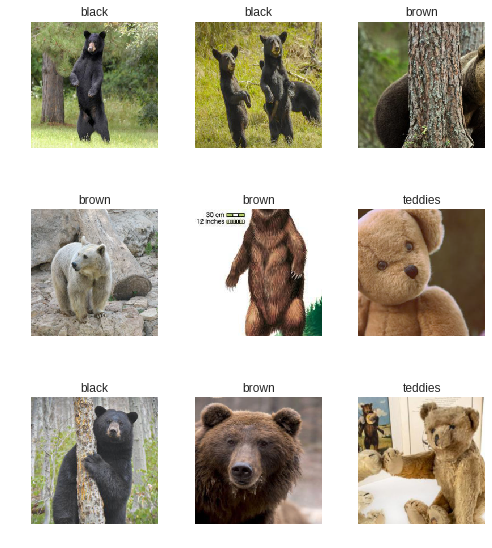

In [28]:
data.show_batch(rows=3, figsize=(7,8))

In [29]:
len(data.train_ds), len(data.valid_ds)

(436, 109)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.891741,0.225351,0.055046
2,0.538427,0.096260,0.036697
3,0.386779,0.080769,0.027523
4,0.302424,0.077023,0.027523


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


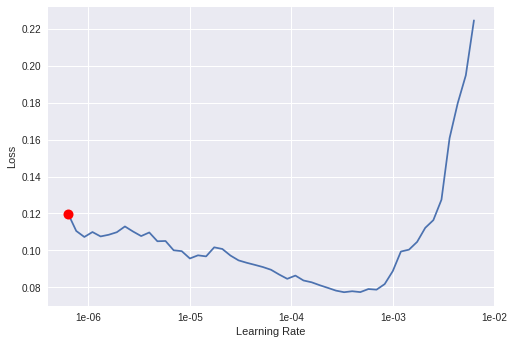

In [11]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.048140,0.082763,0.027523
2,0.046906,0.083827,0.027523


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

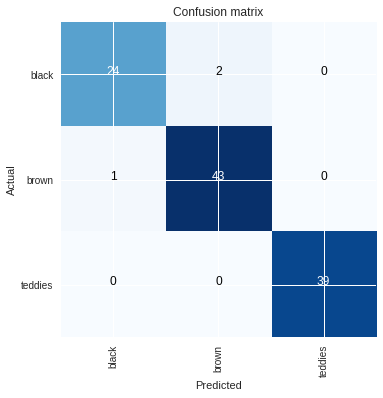

In [18]:
interp.plot_confusion_matrix()

In [44]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
learn.export()

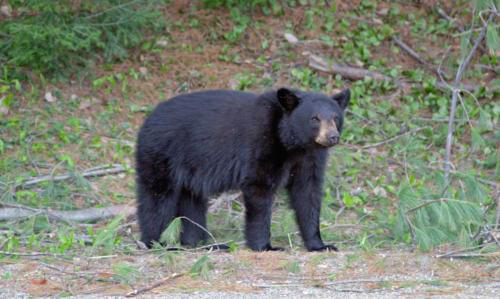

In [20]:
img = open_image(path/'black'/'00000021.jpg')
img

In [0]:
test = load_learner(path)

In [30]:
pred_class,pred_idx,outputs = test.predict(img)
print(outputs)  #'black', 'brown', 'teddies'
pred_class

tensor([9.9998e-01, 1.0696e-05, 6.3764e-06])


Category black